<a href="https://colab.research.google.com/github/Jhernandezh2/MetodosI_JulianaHernandez_MariaCamilaRamirez/blob/main/Parcial%203/Parcial_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema 9: Estimación de la temperatura de un gas diatómico

In [46]:
import numpy as np


url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Maxwell.csv'


velocity_data = np.loadtxt(url, delimiter=',', skiprows=1)

print(velocity_data[:20])

[547.26577301 449.92041803 773.81438168 823.6683893  352.87388651
 426.76683793 532.21981952 236.32006943 464.98048895 713.87872025
 315.69960241 525.60642077 427.55805551 680.03297586 265.24787067
 235.00348209 254.20055191 574.31391833 593.05694157 410.36037376]


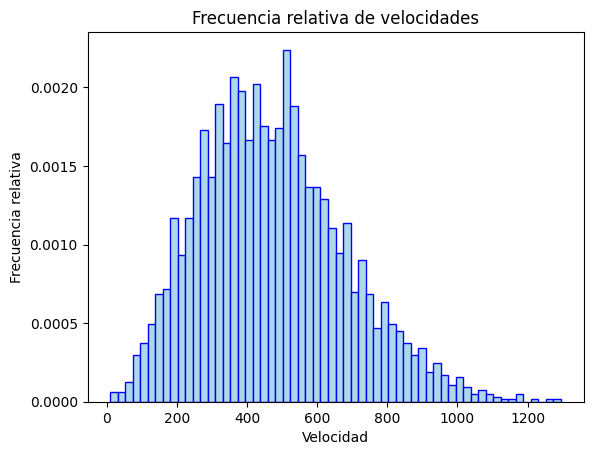

In [10]:
import numpy as np
import matplotlib.pyplot as plt

plt.hist(velocity_data, bins=60, density=True, color='lightblue', edgecolor='blue')

plt.xlabel('Velocidad')
plt.ylabel('Frecuencia relativa')
plt.title('Frecuencia relativa de velocidades')

plt.show()


In [11]:
import numpy as np

mean_velocity = np.mean(velocity_data)

print(f"Valorpromedio empírico: {mean_velocity:.2f}")


Valorpromedio empírico: 472.18


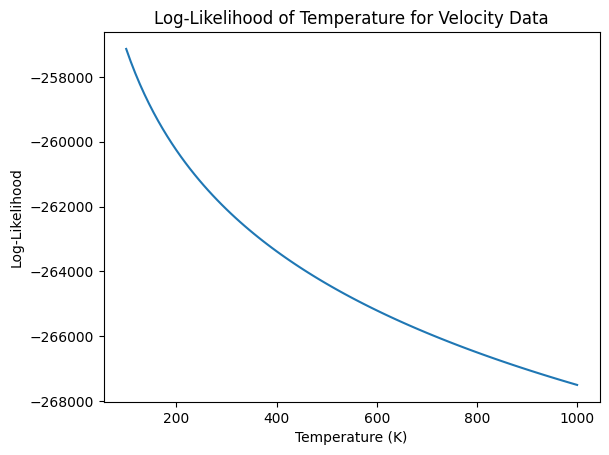

The temperature that best fits the data is approximately 100.00 K


In [12]:
import numpy as np
import matplotlib.pyplot as plt

M = 0.028
NA = 6.022e23
m = M / NA
kB = 8.31


def maxwell_boltzmann(v, T):
    factor = (m / (2 * np.pi * kB * T)) ** (3/2)
    exp_part = np.exp(-m * v**2 / (2 * kB * T))
    return 4 * np.pi * v**2 * factor * exp_part


def likelihood(T, vel):
    likelihood_vals = maxwell_boltzmann(vel, T)
    return np.prod(likelihood_vals)


def log_likelihood(T, vel):
    likelihood_vals = maxwell_boltzmann(vel, T)
    return np.sum(np.log(likelihood_vals))


vel = velocity_data
temps = np.linspace(100, 1000, 100)
log_likelihoods = [log_likelihood(T, vel) for T in temps]

plt.plot(temps, log_likelihoods)
plt.xlabel('Temperature (K)')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood of Temperature for Velocity Data')
plt.show()

best_temperature = temps[np.argmax(log_likelihoods)]
print(f"The temperature that best fits the data is approximately {best_temperature:.2f} K")


Mejor temperatura: 294.12 K


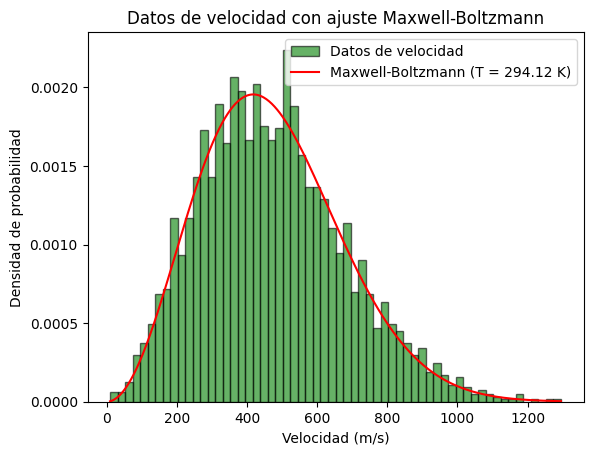

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

m = 0.028 / 6.022e23
kB = 1.38e-23

def MaxwellBoltzmann(v, T, scale):
    factor = (m / (2 * np.pi * kB * T)) ** (3/2)
    exp_part = np.exp(-m * v**2 / (2 * kB * T))
    return scale * 4 * np.pi * v**2 * factor * exp_part

velocidades = velocity_data
data, bins = np.histogram(velocidades, bins=60, density=True)
bin_medios = 0.5 * (bins[1:] + bins[:-1])  # Midpoints of bins

p0 = [297.89, 1.0]

params, covariance = curve_fit(MaxwellBoltzmann, bin_medios, data, p0=p0)

best_temp, best_scale = params
print(f"Mejor temperatura: {best_temp:.2f} K")

plt.hist(velocidades, bins=60, density=True, alpha=0.6, color='g', edgecolor='black', label="Datos de velocidad")

v_fit = np.linspace(min(velocidades), max(velocidades), 500)  # Range for velocities to plot
mb_fit = MaxwellBoltzmann(v_fit, best_temp, best_scale)  # Best-fit curve

plt.plot(v_fit, mb_fit, label=f'Maxwell-Boltzmann (T = {best_temp:.2f} K)', color='red')
plt.xlabel('Velocidad (m/s)')
plt.ylabel('Densidad de probabilidad')
plt.title('Datos de velocidad con ajuste Maxwell-Boltzmann')
plt.legend()
plt.show()


Best temperature: 294.12 K
Best scale: 0.98


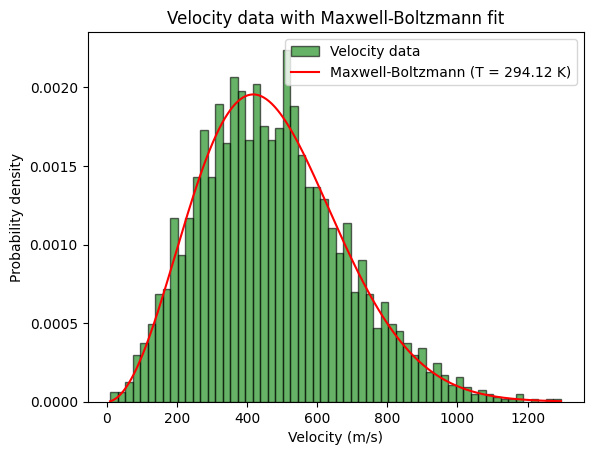

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

m = 0.028 / 6.022e23
kB = 1.38e-23

def MaxwellBoltzmann(v, T, scale):
    factor = (m / (2 * np.pi * kB * T)) ** (3/2)
    exp_part = np.exp(-m * v**2 / (2 * kB * T))
    return scale * 4 * np.pi * v**2 * factor * exp_part

def objective(params, x_data, y_data):
    T, scale = params
    model_values = MaxwellBoltzmann(x_data, T, scale)
    return np.sum((y_data - model_values)**2)

velocidades = velocity_data
data, bins = np.histogram(velocidades, bins=60, density=True)
bin_medios = 0.5 * (bins[1:] + bins[:-1])  # Midpoints of bins

p0 = [297.89, 1.0]

result = minimize(objective, p0, args=(bin_medios, data), method='Nelder-Mead')

best_temp, best_scale = result.x
print(f"Best temperature: {best_temp:.2f} K")
print(f"Best scale: {best_scale:.2f}")

plt.hist(velocidades, bins=60, density=True, alpha=0.6, color='g', edgecolor='black', label="Velocity data")

v_fit = np.linspace(min(velocidades), max(velocidades), 500)
mb_fit = MaxwellBoltzmann(v_fit, best_temp, best_scale)

plt.plot(v_fit, mb_fit, label=f'Maxwell-Boltzmann (T = {best_temp:.2f} K)', color='red')
plt.xlabel('Velocity (m/s)')
plt.ylabel('Probability density')
plt.title('Velocity data with Maxwell-Boltzmann fit')
plt.legend()
plt.show()


In [18]:
import numpy as np


R = 8.31
M = 0.028

T = 297.89

vp = np.sqrt(2 * R * T / M)
print(f"Velocidad más probable: {vp:.2f} m/s")

vm = np.sqrt(2 / np.pi) * vp
print(f"Velocidad promedio: {vm:.2f} m/s")


Velocidad más probable: 420.50 m/s
Velocidad promedio: 335.51 m/s


Reasoning:
The most probable velocity
𝑣
𝑝
v
p
​
  is the peak of the Maxwell-Boltzmann distribution, representing the velocity at which the highest number of particles are found.
The average speed
𝑣
𝑚
v
m
​
 , on the other hand, is calculated as the average of all velocities in the distribution. Since the distribution is skewed, the average speed is typically higher than the most probable velocity because the distribution tail extends toward higher velocities.
The empirical value for
𝑣
𝑚
v
m
​
  is often very close to the theoretical value calculated using this formula, though the exact difference will depend on factors like the specific gas and its temperature.

In [31]:
R = 8.314  # J/(mol·K)
T = 300
M = 28.97

M_kg_per_mol = M / 1000
vel_cuad = (3 * R * T) / M_kg_per_mol

vel_rms = np.sqrt(vel_cuad)

print(f"Velocidad cuadrática media {vel_cuad:.2f} m^2/s^2")
print(f"Velocidad cuadrática media (rms) {vel_rms:.2f} m/s")


Velocidad cuadrática media 258287.88 m^2/s^2
Velocidad cuadrática media (rms) 508.22 m/s


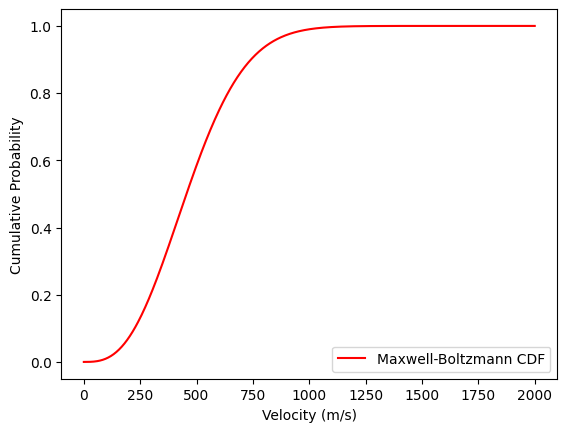

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

def maxwell_boltzmann(v, M, T):
    k_B = 1.38e-23
    return (m / (2 * np.pi * k_B * T))**(3/2) * 4 * np.pi * v**2 * np.exp(- m * v**2 / (2 * k_B * T))

M = 0.028 / 1000
T = 297.89
velocities = np.linspace(0.1, 2000, 500)

pdf_values = maxwell_boltzmann(velocities, M, T)

cdf_values = np.cumsum(pdf_values) * (velocities[1] - velocities[0])  # Use the trapezoidal rule

#plt.hist(samples, bins=50, density=True, alpha=0.6, color='g', label="Samples")

plt.plot(velocities, cdf_values, color='r', label="Maxwell-Boltzmann CDF")

plt.xlabel('Velocity (m/s)')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()


In [32]:
velocity_data = np.array(velocity_data)

std_dev = np.std(velocity_data)
N = len(velocity_data)
standard_error = std_dev / np.sqrt(N)

print(f"Error: {standard_error}")


Error: 3.754188458825477


In [34]:
import numpy as np


mean_velocity = np.mean(velocity_data)

std_dev_velocity = np.std(velocity_data, ddof=1)

N = len(velocity_data)
z = 1.96
margin_of_error = z * std_dev_velocity / np.sqrt(N)

v_up = mean_velocity + margin_of_error

M = 0.028 / 1000
k_B = 1.38e-23

T_up = (v_up**2 * M) / (3 * k_B)

# Output the results
print(f"Mean velocity (v_bar): {mean_velocity:.2f} m/s")
print(f"Standard deviation (sigma_v): {std_dev_velocity:.2f} m/s")
print(f"Margin of error: {margin_of_error:.2f} m/s")
print(f"Upper bound velocity (v_up): {v_up:.2f} m/s")
print(f"Upper bound temperature (T_up): {T_up:.2f} K")


Mean velocity (v_bar): 472.18 m/s
Standard deviation (sigma_v): 205.66 m/s
Margin of error: 7.36 m/s
Upper bound velocity (v_up): 479.54 m/s
Upper bound temperature (T_up): 155524462180018792955904.00 K


In [41]:
velocity_data

array([Ellipsis], dtype=object)

In [48]:

M = 0.028 / 1000
k_B = 1.38e-23

mean_velocity = np.mean(velocity_data)
std_dev_velocity = np.std(velocity_data, ddof=1)
N = len(velocity_data)
z = 1.96
margin_of_error = z * std_dev_velocity / np.sqrt(N)


v_up = mean_velocity + margin_of_error

T_up = (v_up**2 * M) / (3 * k_B)



# Problema 10: Higgs boson discovery

In [51]:
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/HiggsFitting.csv'


higgs_data = np.loadtxt(url, delimiter=',', skiprows=1)

print(higgs_data[:20])

[110.78833312 104.85217    104.3060318  135.54409197 109.72306624
 119.70726329 108.00252576 109.48049372 108.8534869  103.80606579
 104.0663463  123.84520079 150.65879171 112.85583631 141.62816158
 114.18627525 123.27454208 123.72640368 114.72665253 100.29986365]


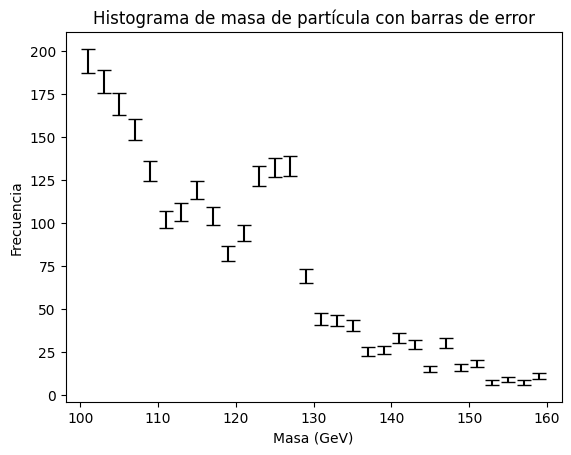

In [53]:
import numpy as np
import matplotlib.pyplot as plt

mass_range = (100, 160)
bins = 30

HSignalBkg, bin_edges = np.histogram(higgs_data, bins=bins, range=mass_range, density=False)

bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

yerr = 0.5 * np.sqrt(HSignalBkg)

plt.errorbar(bin_centers, HSignalBkg, yerr=yerr, fmt='none', ecolor='k', capsize=5)

plt.xlabel('Masa (GeV)')
plt.ylabel('Frecuencia')
plt.title('Histograma de masa de partícula con barras de error')

plt.show()


<ipython-input-54-40c2950d687d>:6: RuntimeWarning: divide by zero encountered in log
  return -len(data) * np.log(alpha) - np.sum((data - 100) / alpha)
<ipython-input-54-40c2950d687d>:6: RuntimeWarning: divide by zero encountered in divide
  return -len(data) * np.log(alpha) - np.sum((data - 100) / alpha)
<ipython-input-54-40c2950d687d>:6: RuntimeWarning: invalid value encountered in subtract
  return -len(data) * np.log(alpha) - np.sum((data - 100) / alpha)


El valor estimado de alpha es: 1.00


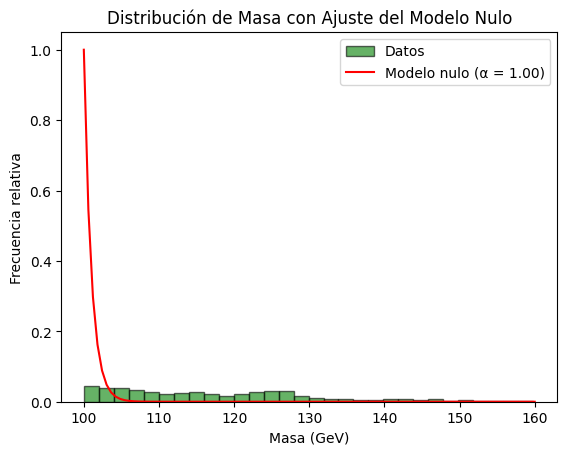

In [54]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def likelihood(alpha, data):
    return -len(data) * np.log(alpha) - np.sum((data - 100) / alpha)

result = minimize(likelihood, x0=[1], args=(higgs_data,), bounds=[(0, None)])

alpha_hat = result.x[0]
print(f"El valor estimado de alpha es: {alpha_hat:.2f}")




Best alpha: 30.88


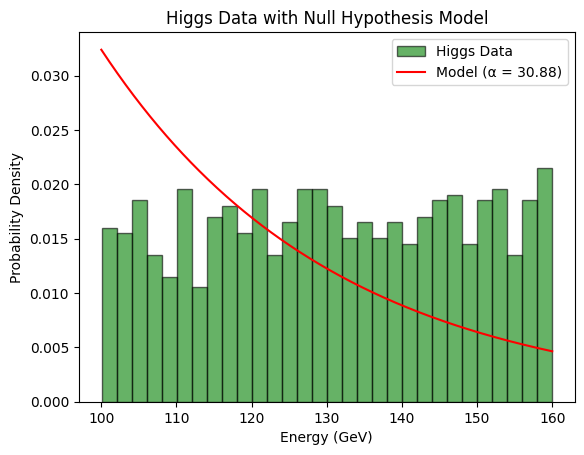

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize


def likelihood(alpha, x_data):
    return (1/alpha) * np.exp(-(x_data - 100) / alpha)

def neg_log_likelihood(alpha, x_data):

    log_likelihood = -np.sum(np.log(likelihood(alpha, x_data)))
    return log_likelihood

alpha_initial = [10]

bounds = [(0, 50)]

result = minimize(neg_log_likelihood, alpha_initial, args=(higgs_data,), bounds=bounds)

best_alpha = result.x[0]
print(f"Best alpha: {best_alpha:.2f}")

plt.hist(higgs_data, bins=30, density=True, alpha=0.6, color='g', edgecolor='black', label="Higgs Data")

x_fit = np.linspace(100, 160, 500)
model_fit = likelihood(best_alpha, x_fit)

plt.plot(x_fit, model_fit, label=f'Model (α = {best_alpha:.2f})', color='red')

plt.xlabel('Energy (GeV)')
plt.ylabel('Probability Density')
plt.title('Higgs Data with Null Hypothesis Model')
plt.legend()
plt.show()


Mejor alpha: 30.88


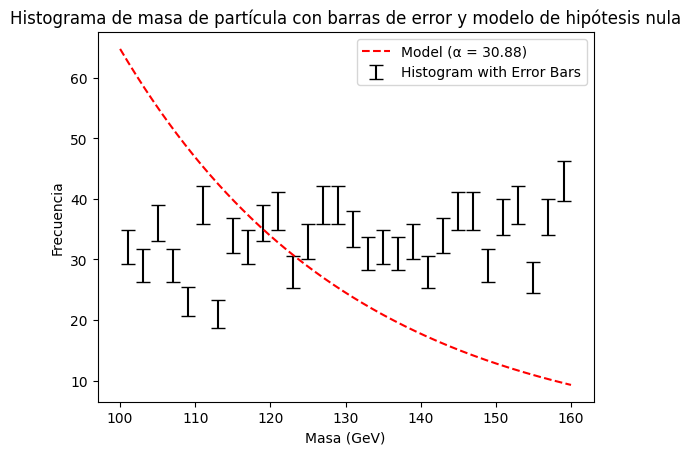

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def likelihood(alpha, x_data):
    return (1/alpha) * np.exp(-(x_data - 100) / alpha)

def neg_log_likelihood(alpha, x_data):
    log_likelihood = -np.sum(np.log(likelihood(alpha, x_data)))
    return log_likelihood

alpha_initial = [10]

bounds = [(0, 50)]

result = minimize(neg_log_likelihood, alpha_initial, args=(higgs_data,), bounds=bounds)

best_alpha = result.x[0]
print(f"Mejor alpha: {best_alpha:.2f}")

mass_range = (100, 160)
bins = 30

HSignalBkg, bin_edges = np.histogram(higgs_data, bins=bins, range=mass_range, density=False)

bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

yerr = 0.5 * np.sqrt(HSignalBkg)

plt.errorbar(bin_centers, HSignalBkg, yerr=yerr, fmt='none', ecolor='k', capsize=5, label="Histogram with Error Bars")

x_fit = np.linspace(100, 160, 500)
model_fit = likelihood(best_alpha, x_fit) * (bin_edges[1] - bin_edges[0]) * len(higgs_data)  # Scale to match counts

plt.plot(x_fit, model_fit, label=f'Model (α = {best_alpha:.2f})', color='red', linestyle='--')

plt.xlabel('Masa (GeV)')
plt.ylabel('Frecuencia')
plt.title('Histograma de masa de partícula con barras de error y modelo de hipótesis nula')

plt.legend()
plt.show()


Best A: 0.59, Best mu: 140.13 GeV, Best sigma: 12.60, Best alpha: 15.80


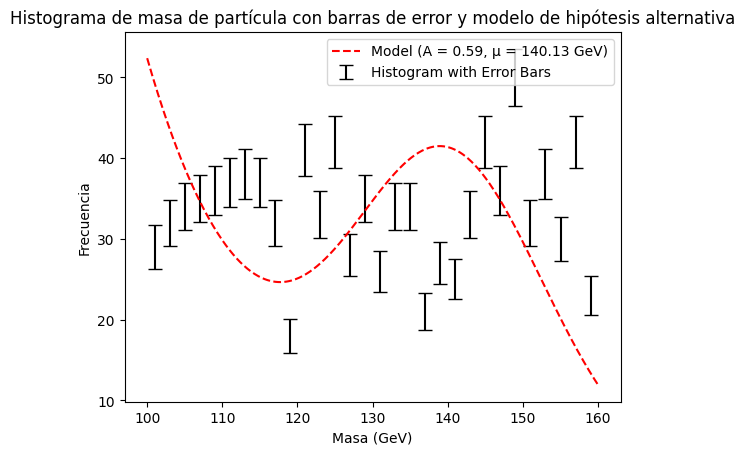

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def likelihood_alt(params, x_data):
    A, mu, sigma, alpha = params
    signal = A * (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(x_data - mu)**2 / (2 * sigma**2))
    background = (1 - A) * (1 / alpha) * np.exp(-(x_data - 100) / alpha)
    return signal + background

def neg_log_likelihood_alt(params, x_data):
    log_likelihood = -np.sum(np.log(likelihood_alt(params, x_data)))
    return log_likelihood

params_initial = [0.5, 125, 10, 10]  # A = 0.5, mu = 125 GeV, sigma = 10, alpha = 10

bounds = [(0, 1), (100, 160), (1, 20), (0.1, 50)]
result = minimize(neg_log_likelihood_alt, params_initial, args=(higgs_data,), bounds=bounds)

best_A, best_mu, best_sigma, best_alpha = result.x
print(f"Best A: {best_A:.2f}, Best mu: {best_mu:.2f} GeV, Best sigma: {best_sigma:.2f}, Best alpha: {best_alpha:.2f}")

mass_range = (100, 160)
bins = 30

HSignalBkg, bin_edges = np.histogram(higgs_data, bins=bins, range=mass_range, density=False)

bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

yerr = 0.5 * np.sqrt(HSignalBkg)

plt.errorbar(bin_centers, HSignalBkg, yerr=yerr, fmt='none', ecolor='k', capsize=5, label="Histogram with Error Bars")

x_fit = np.linspace(100, 160, 500)
model_fit = likelihood_alt([best_A, best_mu, best_sigma, best_alpha], x_fit) * (bin_edges[1] - bin_edges[0]) * len(higgs_data)  # Scale to match counts

plt.plot(x_fit, model_fit, label=f'Model (A = {best_A:.2f}, µ = {best_mu:.2f} GeV)', color='red', linestyle='--')

plt.xlabel('Masa (GeV)')
plt.ylabel('Frecuencia')
plt.title('Histograma de masa de partícula con barras de error y modelo de hipótesis alternativa')

plt.legend()
plt.show()


In [84]:

from scipy.optimize import minimize

# Definir la función de verosimilitud para el modelo de la hipótesis nula
def verosimilitud_nula(alpha, x_data):
    # Prevenir división por cero para valores pequeños de alpha
    alpha = np.maximum(alpha, 1e-5)
    return (1 / alpha) * np.exp(-(x_data - 100) / alpha)

# Definir la función de verosimilitud para el modelo de la hipótesis alternativa
def verosimilitud_alternativa(A, mu, sigma, alpha, x_data):
    # Asegurar que alpha y sigma no sean demasiado pequeños para la estabilidad numérica
    alpha = np.maximum(alpha, 1e-5)  # Evitar división por cero para alpha
    sigma = np.maximum(sigma, 1e-5)  # Evitar división por cero para sigma

    # Componente de señal (distribución Gaussiana para la señal de Higgs)
    señal = A * (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(x_data - mu)**2 / (2 * sigma**2))

    # Componente de fondo (decadencia exponencial)
    fondo = (1 - A) * (1 / alpha) * np.exp(-(x_data - 100) / alpha)

    # Retornar la verosimilitud combinada
    return señal + fondo

# Definir la función de log-verosimilitud negativa para la hipótesis alternativa
def log_verosimilitud_negativa_alternativa(params, x_data):
    A, mu, sigma, alpha = params
    verosimilitud = verosimilitud_alternativa(A, mu, sigma, alpha, x_data)
    # Prevenir log(0) al limitar la verosimilitud a un valor pequeño
    verosimilitud = np.maximum(verosimilitud, 1e-10)
    return -np.sum(np.log(verosimilitud))

# Definir la función de log-verosimilitud negativa para la hipótesis nula
def log_verosimilitud_negativa_nula(alpha, x_data):
    verosimilitud = verosimilitud_nula(alpha, x_data)
    # Prevenir log(0) al limitar la verosimilitud a un valor pequeño
    verosimilitud = np.maximum(verosimilitud, 1e-10)
    return -np.sum(np.log(verosimilitud))

# Suposición inicial para los parámetros (A, mu, sigma, alpha) para la hipótesis alternativa
suposicion_inicial = [0.5, 125.0, 2.0, 10.0]  # Estos son valores de inicio de ejemplo

# Límites para los parámetros
límites = [(0, 1), (100, 160), (0, 10), (0, 50)]

# Usar scipy.optimize.minimize para encontrar los mejores parámetros para la hipótesis alternativa
resultado_alt = minimize(log_verosimilitud_negativa_alternativa, suposicion_inicial, args=(higgs_data,), bounds=límites)

# Extraer los mejores parámetros para la hipótesis alternativa
mejor_A, mejor_mu, mejor_sigma, mejor_alpha = resultado_alt.x
print(f"Mejor A: {mejor_A:.2f}, Mejor mu: {mejor_mu:.2f}, Mejor sigma: {mejor_sigma:.2f}, Mejor alpha: {mejor_alpha:.2f}")

# Minimizar la log-verosimilitud negativa para la hipótesis nula (solo el parámetro alpha)
resultado_nula = minimize(log_verosimilitud_negativa_nula, [mejor_alpha], args=(higgs_data,), bounds=[(0, 50)])

# Extraer el mejor alpha para la hipótesis nula
mejor_alpha_nula = resultado_nula.x[0]
print(f"Mejor alpha (hipótesis nula): {mejor_alpha_nula:.2f}")

# Calcular la verosimilitud para ambas hipótesis
L_nula = np.exp(-log_verosimilitud_negativa_nula(mejor_alpha_nula, higgs_data))
L_alt = np.exp(-log_verosimilitud_negativa_alternativa(resultado_alt.x, higgs_data))

# Asegurar que las verosimilitudes no sean cero antes de calcular nσ
L_nula = np.maximum(L_nula, 1e-10)
L_alt = np.maximum(L_alt, 1e-10)

# Calcular nσ usando el método de diferencia de log-verosimilitudes
n_sigma = np.sqrt(-2 * (np.log(L_alt) - np.log(L_nula)))
print(f"nσ ≈ {n_sigma:.2f}")


Mejor A: 0.52, Mejor mu: 142.76, Mejor sigma: 10.00, Mejor alpha: 16.87
Mejor alpha (hipótesis nula): 30.23
nσ ≈ -0.00


In [85]:

h_bar = 1.015e-23
GeV_to_J = 1.602e-10

sigma_GeV = mejor_sigma
sigma_J = sigma_GeV * GeV_to_J

tau = h_bar / sigma_J
print(f"El tiempo de vida de la partícula es: {tau:.2e} s")


El tiempo de vida de la partícula es: 6.34e-15 s


In [86]:

def LogPrior(p):
    A, mu, sigma, alpha = p
    if 0. < A < 1. and 100. <= mu <= 300. and 0.1 <= sigma <= 20. and 1 <= alpha <= 50:
        return 0.
    else:
        return -np.inf


In [87]:
def likelihood(A, mu, sigma, alpha, x_data):

    signal = A * (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(x_data - mu)**2 / (2 * sigma**2))

    background = (1 - A) * (1 / alpha) * np.exp(-(x_data - 100) / alpha)

    return signal + background

In [88]:
def LogLikelihood(p, x_data):
    A, mu, sigma, alpha = p

    model = likelihood(A, mu, sigma, alpha, x_data)

    log_likelihood = -np.sum(np.log(model))
    return log_likelihood


In [90]:
!pip install emcee
import emcee

n_params = 4

n_walkers = 50
n_steps = 1000

initial_pos = np.random.rand(n_walkers, n_params)
initial_pos[:, 0] *= 0.99
initial_pos[:, 1] = 100 + initial_pos[:, 1] * 200
initial_pos[:, 2] = 0.1 + initial_pos[:, 2] * 19.9
initial_pos[:, 3] = 1 + initial_pos[:, 3] * 49

def log_probability(p, x_data):
    lp = LogPrior(p)
    if not np.isfinite(lp):
        return -np.inf
    return -LogLikelihood(p, x_data) + lp

sampler = emcee.EnsembleSampler(n_walkers, n_params, log_probability, args=[higgs_data])

sampler.run_mcmc(initial_pos, n_steps, progress=True)

samples = sampler.get_chain(flat=True)

A_est = np.mean(samples[:, 0])
mu_est = np.mean(samples[:, 1])
sigma_est = np.mean(samples[:, 2])
alpha_est = np.mean(samples[:, 3])

print(f"Estimación de A: {A_est:.3f}")
print(f"Estimación de mu: {mu_est:.3f} GeV")
print(f"Estimación de sigma: {sigma_est:.3f} GeV")
print(f"Estimación de alpha: {alpha_est:.3f}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 4.1 MB/s eta 0:00:00


100%|██████████| 1000/1000 [00:04<00:00, 202.06it/s]

Estimación de A: 0.429
Estimación de mu: 176.112 GeV
Estimación de sigma: 11.084 GeV
Estimación de alpha: 19.645


100%|██████████| 1000/1000 [00:05<00:00, 185.31it/s]


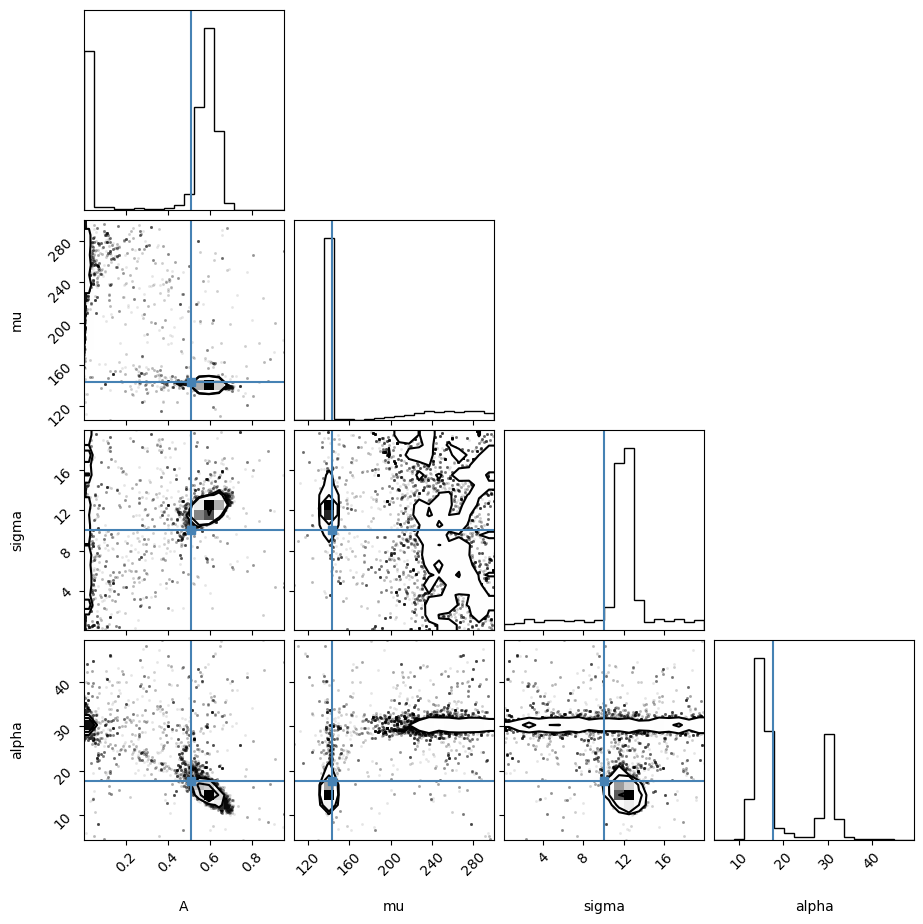

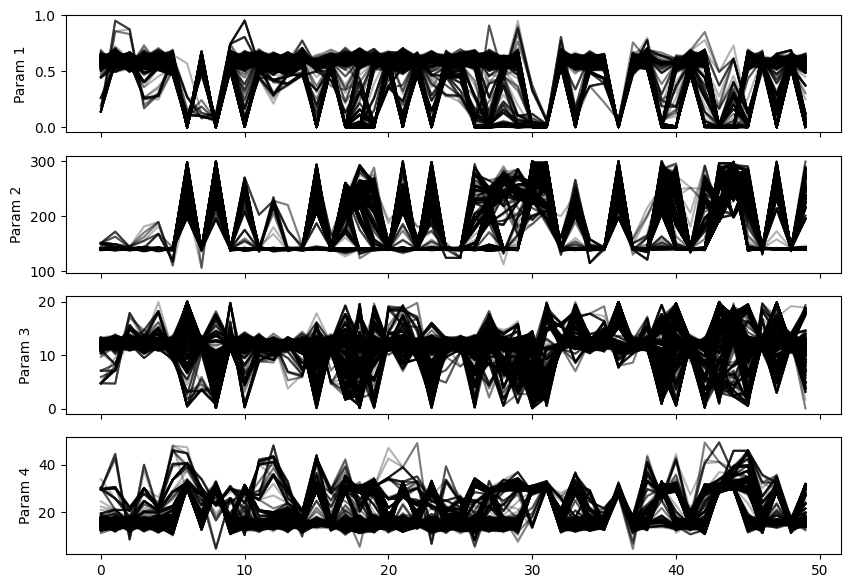

In [92]:
!pip install corner
import emcee
import numpy as np
import corner
import matplotlib.pyplot as plt

initial_pos = np.random.rand(n_walkers, n_params)
initial_pos[:, 0] *= 0.99  # A entre 0 y 1
initial_pos[:, 1] = 100 + initial_pos[:, 1] * 200  # mu entre 100 y 300
initial_pos[:, 2] = 0.1 + initial_pos[:, 2] * 19.9  # sigma entre 0.1 y 20
initial_pos[:, 3] = 1 + initial_pos[:, 3] * 49  # alpha entre 1 y 50

def log_probability(p, x_data):
    lp = LogPrior(p)
    if not np.isfinite(lp):
        return -np.inf
    return -LogLikelihood(p, x_data) + lp

sampler = emcee.EnsembleSampler(n_walkers, n_params, log_probability, args=[higgs_data])

sampler.run_mcmc(initial_pos, n_steps, progress=True)

samples = sampler.get_chain(flat=True)

fig = corner.corner(samples, labels=["A", "mu", "sigma", "alpha"], truths=[0.51, 143.29, 10.0, 17.73])
plt.show()

fig, axes = plt.subplots(n_params, figsize=(10, 7), sharex=True)
for i in range(n_params):
    axes[i].plot(sampler.chain[:, :, i], "k", alpha=0.3)
    axes[i].set_ylabel(f"Param {i+1}")
plt.show()


In [93]:

mu_real = 143.29
mu_estimado = np.mean(samples[:, 1])
error_porcentual = np.abs(mu_estimado - mu_real) / mu_real * 100

print(f"Estimación de la masa: {mu_estimado:.3f} GeV")
print(f"Error porcentual en la estimación de la masa: {error_porcentual:.2f}%")


Estimación de la masa: 174.127 GeV
Error porcentual en la estimación de la masa: 21.52%
